#**Mount my drive, and from there we fetch the files**#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**Importing Libraries**#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#**Load the dataset**#

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/netflix/combined_data.txt', header = None,names = ['Cust_Id', 'Rating'], usecols = [0,1])
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
df.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
# converting the rating columns into float
df['Rating'] = df['Rating'].astype(float)

#**Information of data**#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


#**Finding the count or distribution for all the rating in our dataset**#

In [ ]:
distRating = df.groupby('Rating')['Rating'].agg(['count'])
distRating

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


#**Finding out the total movies**#

In [ ]:
movieCount = df.isnull().sum()[1]
print('Total Movies in the dataset',movieCount)

Total Movies in the dataset 4499


#**Finding the total number of rating**#

In [ ]:
ratingCount = df['Cust_Id'].count() - movieCount
print('Total rating irrespective of duplicate ratings:', ratingCount)

Total rating irrespective of duplicate ratings: 24053764


#**Finding the number of unique users**#

In [ ]:
usersCount = df['Cust_Id'].nunique() - movieCount
print('The total number of unique users:', usersCount)

The total number of unique users: 470758


#**Plotting the distribution of the ratings**#

Text(0.5, 1.0, 'Total Pool: 4499 Movies, 470758 Users, 24053764 ratings')

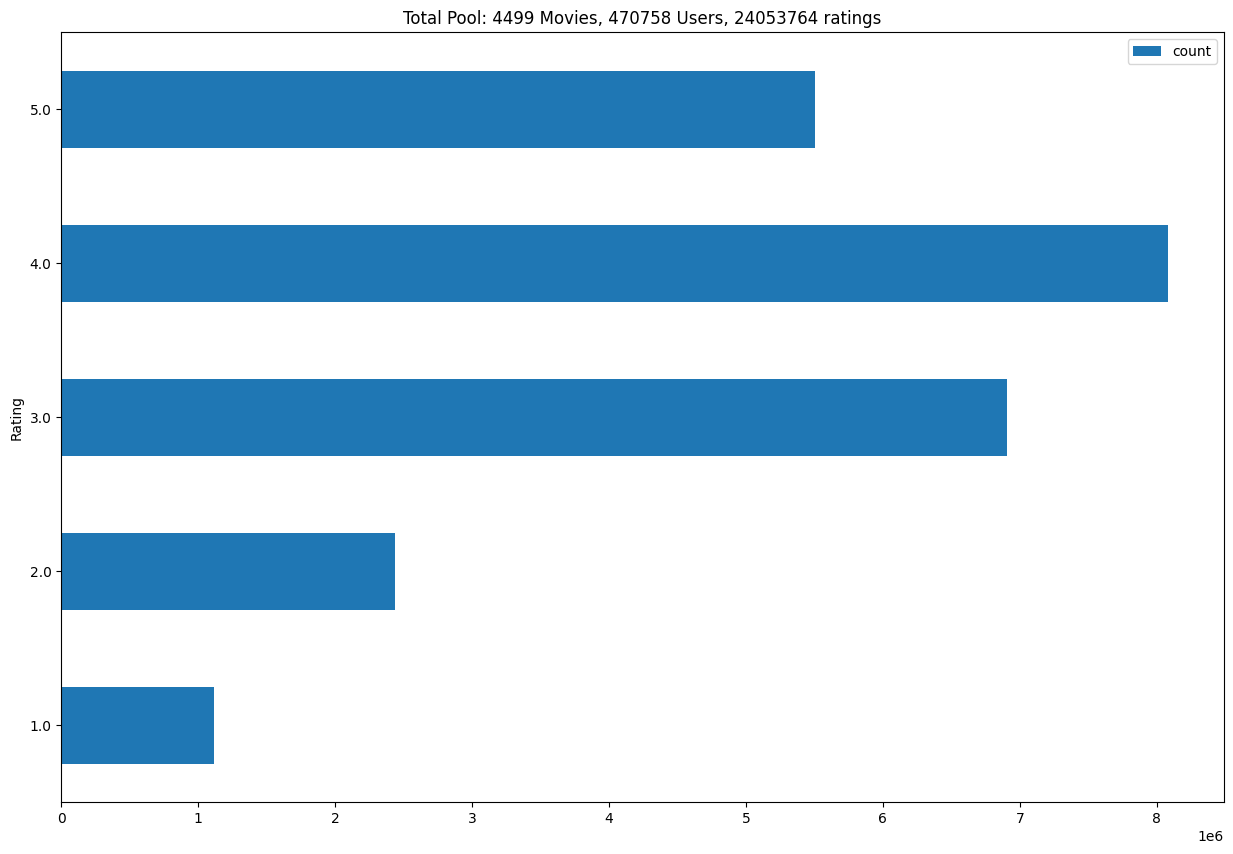

In [ ]:
fig = distRating.plot(kind = 'barh', legend = True, figsize = (15, 10))
plt.title(f'Total Pool: {movieCount} Movies, {usersCount} Users, {ratingCount} ratings')

#**Creating a array containing the movies IDs wrt the rows of ratings**#

In [ ]:
df_NAN = pd.DataFrame(pd.isnull(df.Rating))
df_NAN.value_counts()

Rating
False     24053764
True          4499
dtype: int64

#**Storing the index of all the moveies containing the NAN values**#

In [ ]:
df_NAN = df_NAN[df_NAN['Rating']==True]
df_NAN.shape

(4499, 1)

In [ ]:
# resetting the index for the given NAN dataset
df_NAN = df_NAN.reset_index()
df_NAN.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


#**Dividing the movies, cust_id and ratings into different columns**#

In [ ]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_NAN['index'][1:],df_NAN['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1
last_record = np.full((1,len(df) - df_NAN.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


The len(dataset) expression is used to calculate the length of the dataset. The df_nan.iloc[-1, 0] expression is used to get the index of the last record in the dataset. The movie_id variable is used to get the ID of the last record.

In [ ]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


#**Combining the data together**#

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = df[pd.notnull(df['Rating'])]  #non movies count
df['MovieID'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('The merged dataset')
df.tail()

The merged dataset


,Cust_Id,Rating,MovieID
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


#**Data Cleaning**#

**For movie with least ratings**

In [ ]:
f = ['count', 'mean']
dfMovieSummary = df.groupby('MovieID')['Rating'].agg(f)

In [ ]:
dfMovieSummary.index = dfMovieSummary.index.map(int)
movieBenchmark = round(dfMovieSummary['count'].quantile(0.7),0)
movieDropList = dfMovieSummary[dfMovieSummary['count'] < movieBenchmark].index
print('Movie (ID) with the minimum review : {}'.format(movieBenchmark))

Movie with the minimum review : 1799.0


**Users that are mostly inactive**

In [ ]:
dfCustSummary = df.groupby('Cust_Id')['Rating'].agg(f)
dfCustSummary.index = dfCustSummary.index.map(int)
custBenchmark = round(dfCustSummary['count'].quantile(0.7),0)
custDropList = dfCustSummary[dfCustSummary['count'] < custBenchmark].index
print('Customer with the minimum review : {}'.format(custBenchmark))

Customer with the minimum review : 52.0


In [ ]:
# shape
df.shape

(24053764, 3)

#**Dropping the inactive users and the least rated movies**#

In [ ]:
# dropping least rated movies
df = df[~df['MovieID'].isin(movieDropList)]
# dropping the inactive users
df = df[~df['Cust_Id'].isin(custDropList)]

In [ ]:
df.shape

(17337458, 3)

In total we have dropped around 6,716,306 records

In [ ]:
df.head()

,Cust_Id,Rating,MovieID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


#**Create a rating matrix using pivot tables**#

In [ ]:
df_Pivot = pd.pivot_table(df, values='Rating', index = 'Cust_Id', columns= 'MovieID')

In [ ]:
df_Pivot.head()

MovieID,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Pivot.shape

(143458, 1350)

#**Next dataset to be loaded ie. the movie titles**#


In [ ]:
df_title = pd.read_csv('/content/drive/MyDrive/Datasets/netflix/movie_titles.csv', header = None, names  = ['MovieID', 'Year', 'Name'], usecols= [0,1,2])
df_title.head()

,MovieID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [ ]:
df

,Cust_Id,Rating,MovieID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


#**A new library to be used scikit-suprise library for implementing the SVD**#

In [ ]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163484 sha256=d2ec0332d39f35299899580f9287e13f7fcb2ba6e93adc979f89b9bbb21a71ca
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


#**Importing some libraries**#

In [ ]:
import math
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD # single vector decomposition
from surprise.model_selection import cross_validate

In [ ]:
# loading the reader for reading out the data
reader = Reader()

# we are going ahead with 100000 for faster runtime
data = Dataset.load_from_df(df[['Cust_Id', 'MovieID', 'Rating']][:100000], reader)

In [ ]:
data

In [ ]:
# use SVD algorithm algorithm
svd = SVD()

# compute the RMSE of the SVD algo
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9986  0.9944  0.9979  0.9970  0.0018  
MAE (testset)     0.7966  0.7900  0.8057  0.7974  0.0064  
Fit time          1.75    1.93    2.61    2.10    0.37    
Test time         0.22    0.45    0.61    0.43    0.16    


{'test_rmse': array([0.99860982, 0.99442141, 0.99786576]),
 'test_mae': array([0.79655615, 0.79000105, 0.80569336]),
 'fit_time': (1.7519762516021729, 1.9256384372711182, 2.6131887435913086),
 'test_time': (0.21661949157714844, 0.44939136505126953, 0.6131985187530518)}

In [ ]:
df.head()

,Cust_Id,Rating,MovieID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


#**Finding the movies rated as 5 star from the user = 712664**#

In [ ]:
df_712664 = df[(df['Cust_Id']==712664) & (df['Rating']==5)]
df_712664 = df_712664.set_index('MovieID')
df_712664 = df_712664.join(df_title)['Name']
df_712664.head()

MovieID
3                           Paula Abdul's Get Up & Dance
79                                          Winter Kills
175    The History Channel Presents: Troy: Unearthing...
199                         The Fall of the Roman Empire
241       Neon Genesis Evangelion: The End of Evangelion
Name: Name, dtype: object

#**Train our SVD model to predict the further ratings for the user**#

In [ ]:
user_712664 = df_title.copy()
user_712664 = user_712664.reset_index()
# removing all the movies that has been rated less
user_712664 = user_712664[~user_712664['MovieID'].isin(movieDropList)]

In [ ]:
user_712664.head()

,index,MovieID,Year,Name
2,2,3,1997.0,Character
7,7,8,2004.0,What the #$*! Do We Know!?
15,15,16,1996.0,Screamers
16,16,17,2005.0,7 Seconds
17,17,18,1994.0,Immortal Beloved
